In [1]:
# importation:

import torch as torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Parameters

In [2]:
RANDOM_STATE = 32
TEST_SIZE = 0.2
EPOCHS = 500

np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)


# Read the data

In [3]:
data_df = pd.read_csv('wine.csv',header = None)
data_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
# check the shape:
data_df.shape

(178, 14)

In [5]:
# check data info:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    int64  
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    int64  
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
# check null values:
data_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [7]:
data_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [8]:
# find unique values:

for col in data_df.columns:
    print(f'col:{col} | {data_df[col].unique()}')

col:0 | [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
col:1 | [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.02 1.75 1.67
 1.7 

In [9]:
# unique data in target col:

data_df[col].unique()

array([1, 2, 3], dtype=int64)

In [10]:
# find correlation:
data_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<Axes: >

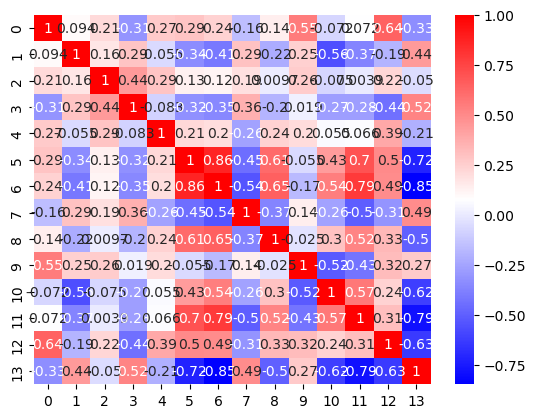

In [11]:
# plot heatmap:

sns.heatmap(data= data_df.corr(), annot=True, cmap = "bwr")

In [12]:
# define labels:

labels = data_df[data_df.columns[-1]]
labels

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: 13, Length: 178, dtype: int64

In [13]:
# define features:

features_df = data_df.drop(data_df.columns[-1], axis = 1)
features_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [14]:
# split the data:

X_train, X_test, y_train, y_test = train_test_split(features_df,
                                                   labels,
                                                   stratify= labels,
                                                   test_size=TEST_SIZE,
                                                   random_state= RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))


# Apply scaler and encoder

In [15]:
# apply standardscaler for features:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# apply label encoder for target:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


# Build the model

In [16]:
model = nn.Sequential(
    
              nn.Linear(X_train.shape[1], 8),
    
              nn.ReLU(),
    
              nn.Linear(8,3)
    
            )

# Loss_function

In [17]:
loss_fn = nn.CrossEntropyLoss()

# define optimizer:

optimizer = torch.optim.Adam(model.parameters())


# convert data into torch

In [18]:
# convert train into torch:

train_X = torch.tensor(X_train, dtype = torch.float32)
train_y = torch.tensor(y_train, dtype = torch.int64)

# convert test also:
test_X = torch.tensor(X_test, dtype = torch.float32)
test_y = torch.tensor(y_test, dtype = torch.int64)


# model testing

In [19]:
pred = model(train_X[:1])
pred

tensor([[0.0920, 0.0560, 0.6400]], grad_fn=<AddmmBackward0>)

In [20]:
loss_fn(pred, train_y[:1]).item()

1.3427834510803223

In [21]:
loss_o, loss_t = [],[]

for epoch in range(EPOCHS):
    
    model.train()
    output = model(train_X)
    
    #calc loss
    loss = loss_fn(output, train_y)
    loss_o.append(loss.item())
    
# Back prop:
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()
    
    # Stop the gradient descent:

    # For test set:
    with torch.no_grad():
        model.eval()
        output = model(test_X)
        tloss = loss_fn(output, test_y)
        loss_t.append(tloss.item())

    print(f'Epoch: {epoch: 2d}; Loss: {loss: .4f} | tloss:{tloss: .6f}')     # loss should be going down
    


Epoch:  0; Loss:  1.1692 | tloss: 1.156046
Epoch:  1; Loss:  1.1643 | tloss: 1.151688
Epoch:  2; Loss:  1.1594 | tloss: 1.147310
Epoch:  3; Loss:  1.1546 | tloss: 1.142931
Epoch:  4; Loss:  1.1498 | tloss: 1.138577
Epoch:  5; Loss:  1.1450 | tloss: 1.134329
Epoch:  6; Loss:  1.1403 | tloss: 1.130174
Epoch:  7; Loss:  1.1355 | tloss: 1.126044
Epoch:  8; Loss:  1.1309 | tloss: 1.121924
Epoch:  9; Loss:  1.1262 | tloss: 1.117814
Epoch:  10; Loss:  1.1215 | tloss: 1.113727
Epoch:  11; Loss:  1.1169 | tloss: 1.109794
Epoch:  12; Loss:  1.1123 | tloss: 1.105879
Epoch:  13; Loss:  1.1077 | tloss: 1.101981
Epoch:  14; Loss:  1.1031 | tloss: 1.098091
Epoch:  15; Loss:  1.0986 | tloss: 1.094213
Epoch:  16; Loss:  1.0941 | tloss: 1.090338
Epoch:  17; Loss:  1.0896 | tloss: 1.086446
Epoch:  18; Loss:  1.0851 | tloss: 1.082547
Epoch:  19; Loss:  1.0806 | tloss: 1.078653
Epoch:  20; Loss:  1.0761 | tloss: 1.074755
Epoch:  21; Loss:  1.0717 | tloss: 1.070861
Epoch:  22; Loss:  1.0672 | tloss: 1.06697

Epoch:  195; Loss:  0.2829 | tloss: 0.335877
Epoch:  196; Loss:  0.2804 | tloss: 0.333554
Epoch:  197; Loss:  0.2780 | tloss: 0.331260
Epoch:  198; Loss:  0.2756 | tloss: 0.328995
Epoch:  199; Loss:  0.2732 | tloss: 0.326756
Epoch:  200; Loss:  0.2708 | tloss: 0.324545
Epoch:  201; Loss:  0.2685 | tloss: 0.322360
Epoch:  202; Loss:  0.2662 | tloss: 0.320202
Epoch:  203; Loss:  0.2639 | tloss: 0.318069
Epoch:  204; Loss:  0.2617 | tloss: 0.315963
Epoch:  205; Loss:  0.2595 | tloss: 0.313881
Epoch:  206; Loss:  0.2573 | tloss: 0.311825
Epoch:  207; Loss:  0.2551 | tloss: 0.309793
Epoch:  208; Loss:  0.2530 | tloss: 0.307785
Epoch:  209; Loss:  0.2509 | tloss: 0.305801
Epoch:  210; Loss:  0.2489 | tloss: 0.303841
Epoch:  211; Loss:  0.2468 | tloss: 0.301896
Epoch:  212; Loss:  0.2448 | tloss: 0.299963
Epoch:  213; Loss:  0.2428 | tloss: 0.298053
Epoch:  214; Loss:  0.2409 | tloss: 0.296167
Epoch:  215; Loss:  0.2389 | tloss: 0.294304
Epoch:  216; Loss:  0.2370 | tloss: 0.292465
Epoch:  21

Epoch:  416; Loss:  0.0758 | tloss: 0.124671
Epoch:  417; Loss:  0.0755 | tloss: 0.124287
Epoch:  418; Loss:  0.0752 | tloss: 0.123908
Epoch:  419; Loss:  0.0749 | tloss: 0.123532
Epoch:  420; Loss:  0.0746 | tloss: 0.123157
Epoch:  421; Loss:  0.0743 | tloss: 0.122783
Epoch:  422; Loss:  0.0740 | tloss: 0.122412
Epoch:  423; Loss:  0.0737 | tloss: 0.122046
Epoch:  424; Loss:  0.0734 | tloss: 0.121680
Epoch:  425; Loss:  0.0731 | tloss: 0.121315
Epoch:  426; Loss:  0.0728 | tloss: 0.120954
Epoch:  427; Loss:  0.0725 | tloss: 0.120597
Epoch:  428; Loss:  0.0722 | tloss: 0.120240
Epoch:  429; Loss:  0.0719 | tloss: 0.119884
Epoch:  430; Loss:  0.0716 | tloss: 0.119531
Epoch:  431; Loss:  0.0713 | tloss: 0.119180
Epoch:  432; Loss:  0.0710 | tloss: 0.118832
Epoch:  433; Loss:  0.0708 | tloss: 0.118484
Epoch:  434; Loss:  0.0705 | tloss: 0.118141
Epoch:  435; Loss:  0.0702 | tloss: 0.117797
Epoch:  436; Loss:  0.0699 | tloss: 0.117455
Epoch:  437; Loss:  0.0696 | tloss: 0.117116
Epoch:  43

In [22]:
pred = model(test_X)
type(pred)

torch.Tensor

In [23]:
y_pred = pred.detach().numpy().argmax(axis = 1)
y_pred

array([2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0,
       1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0], dtype=int64)

In [24]:
# find accuraccuracy_score:

accuracy_score(y_test, y_pred)

0.9722222222222222

In [25]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



<Axes: >

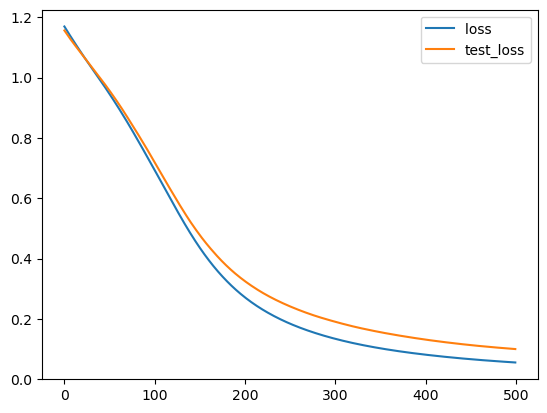

In [26]:
loss_df = pd.DataFrame({'loss ':loss_o, "test_loss":loss_t })
loss_df.plot()